In [9]:
#### IMPORTS ####
using ProgressMeter
using Plots, Measures
using LaTeXStrings
# using NPZ
theme(:default)
include("mOrbRG.jl")
include("helpers.jl")
include("probes.jl")

getGlobalFlow (generic function with 1 method)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:19
Progress: 100%|█████████████████████████████████████████| Time: 0:00:17


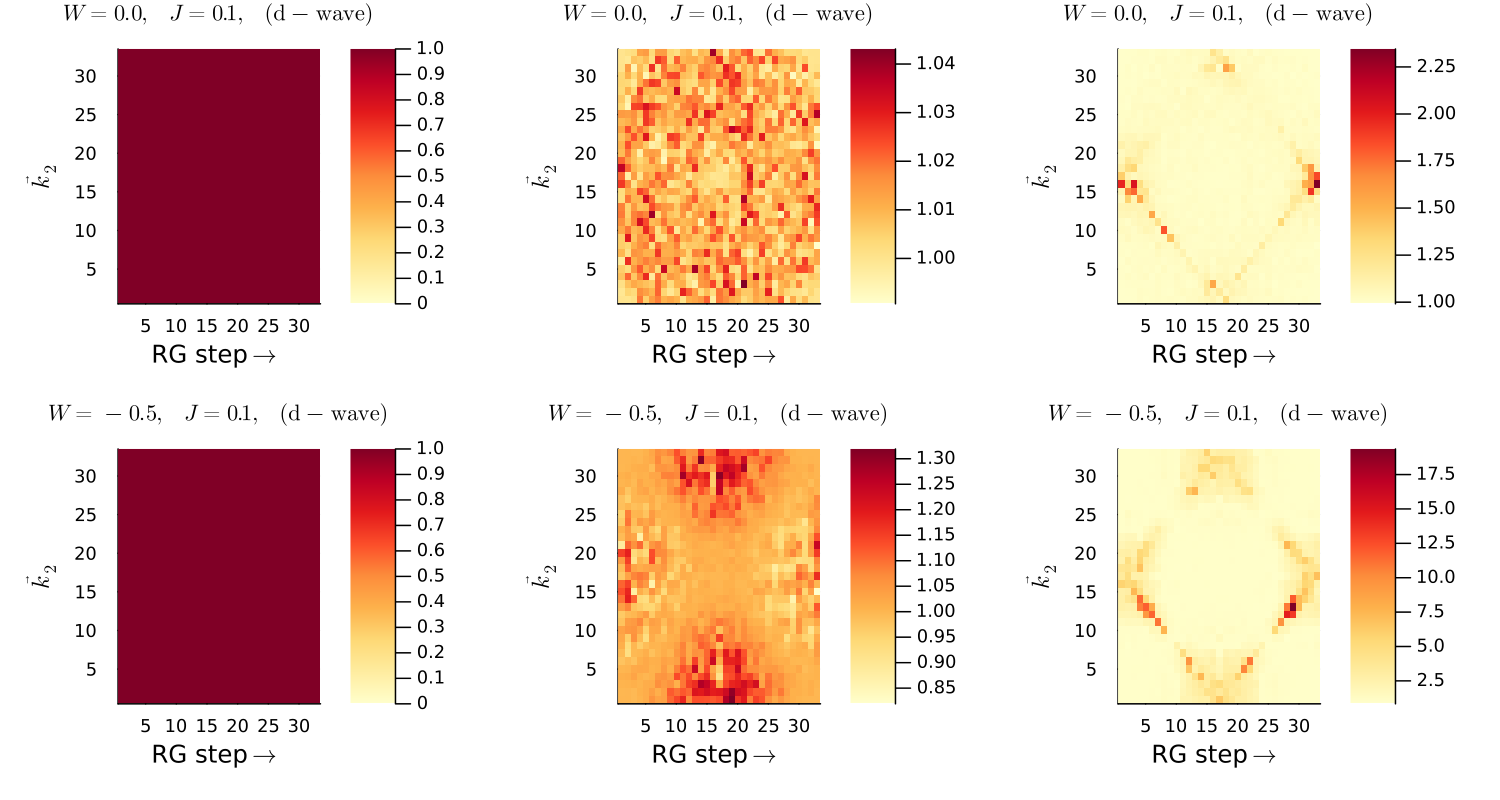

In [10]:
function getRgFlow(num_kspace_half, J_val, W_by_J_val_range)
    num_kspace = 2 * num_kspace_half + 1
    W_val_range = J_val .* W_by_J_val_range
    for orbs in ["d"]
        allplots_global = []
        for (j, W_val) in collect(enumerate(W_val_range))
            kondoJArray, dispersionArray = main(num_kspace_half, J_val, W_val, orbs)
            # println(round.(kondoJArray[:,:,2], digits=2))
            # println("---")
            # println(round.(kondoJArray[:,:,end], digits=2))
            results = getGlobalFlow(kondoJArray, num_kspace_half, 1)
            push!(allplots_global, heatmap(results,
                    title="\$W=$(round(W_val, digits=3)), \\quad J=$(round(J_val, digits=2)), \\quad \\mathrm{($(orbs)-wave)}\$",
                    c=:YlOrRd_9,
                    # xscale=:log10
                    )
            )
            results = getGlobalFlow(kondoJArray, num_kspace_half, Int(num_kspace_half / 2))
            push!(allplots_global, heatmap(results,
                    title="\$W=$(round(W_val, digits=3)), \\quad J=$(round(J_val, digits=2)), \\quad \\mathrm{($(orbs)-wave)}\$",
                    c=:YlOrRd_9,
                    # xscale=:log10
                    )
            )
            results = getGlobalFlow(kondoJArray, num_kspace_half, num_kspace_half)
            push!(allplots_global, heatmap(results,
                    title="\$W=$(round(W_val, digits=3)), \\quad J=$(round(J_val, digits=2)), \\quad \\mathrm{($(orbs)-wave)}\$",
                    c=:YlOrRd_9,
                    # xscale=:log10
                    )
            )
        end
        
        num_columns = div(length(allplots_global), length(W_val_range))
        globalplot = plot(allplots_global..., layout=(length(W_val_range), num_columns), 
            size=(500*num_columns, 400*length(W_val_range)), 
            titlefontsize=10, topmargin=2mm, bottommargin=4mm, leftmargin=3mm, rightmargin=3mm,
            thickness_scaling=1.5, xlabel="RG step\$\\rightarrow\$", ylabel="\$\\vec k_2\$")
        display(globalplot)
    end
end

getRgFlow(16, 0.1, [0., -5.])